In [14]:
import pandas as pd
import numpy as np
import matplotlib as plt

# import diabetic data into dataframes
df = pd.read_csv("dataset_diabetes/diabetic_data.csv", header=0)

# check headers
print(df.columns)


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [15]:
# check data
print(df)


        encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_

In [16]:
# issue with dtype, check dtypes

df.dtypes


encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [17]:
# check shape 

df.shape


(101766, 50)

array([[<AxesSubplot:title={'center':'encounter_id'}>,
        <AxesSubplot:title={'center':'patient_nbr'}>,
        <AxesSubplot:title={'center':'admission_type_id'}>,
        <AxesSubplot:title={'center':'discharge_disposition_id'}>],
       [<AxesSubplot:title={'center':'admission_source_id'}>,
        <AxesSubplot:title={'center':'time_in_hospital'}>,
        <AxesSubplot:title={'center':'num_lab_procedures'}>,
        <AxesSubplot:title={'center':'num_procedures'}>],
       [<AxesSubplot:title={'center':'num_medications'}>,
        <AxesSubplot:title={'center':'number_outpatient'}>,
        <AxesSubplot:title={'center':'number_emergency'}>,
        <AxesSubplot:title={'center':'number_inpatient'}>],
       [<AxesSubplot:title={'center':'number_diagnoses'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

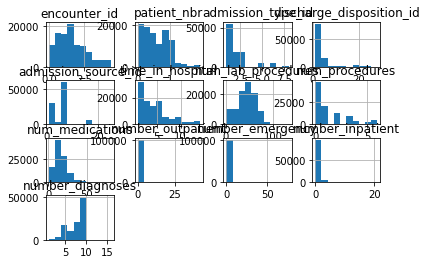

In [18]:

df.hist()

In [19]:



# count up frequency of given medication & sort values by index
df_med = df['num_medications'].value_counts().reset_index().sort_values(by=['index'])

# re-order columns
med_counts = df_med[['index', 'num_medications']]

print(med_counts)

    index  num_medications
36      1              262
31      2              470
26      3              900
23      4             1417
19      5             2017
..    ...              ...
69     72                3
74     74                1
70     75                2
73     79                1
72     81                1

[75 rows x 2 columns]


In [20]:

# count up frequency of given medication & sort values by index
df_lab = df['num_lab_procedures'].value_counts().reset_index().sort_values(by=['index'])

# re-order columns
med_counts = df_lab[['index', 'num_lab_procedures']]

print(df_lab)


     index  num_lab_procedures
0        1                3208
39       2                1101
61       3                 668
71       4                 378
78       5                 286
..     ...                 ...
112    120                   1
113    121                   1
116    126                   1
115    129                   1
117    132                   1

[118 rows x 2 columns]


0    0
dtype: int64

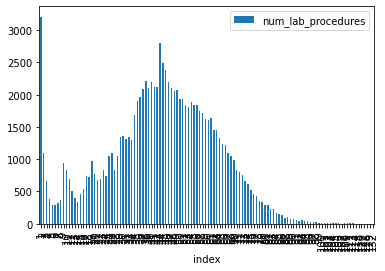

In [21]:

df_lab.plot.bar(x='index', y='num_lab_procedures')

df['num_procedures'].mode()

In [22]:
df['time_in_hospital'].mode()

0    3
dtype: int64

In [23]:

df['num_lab_procedures'].mode()


0    1
dtype: int64

In [24]:
df['num_medications'].mode()

0    13
dtype: int64

<AxesSubplot:xlabel='index'>

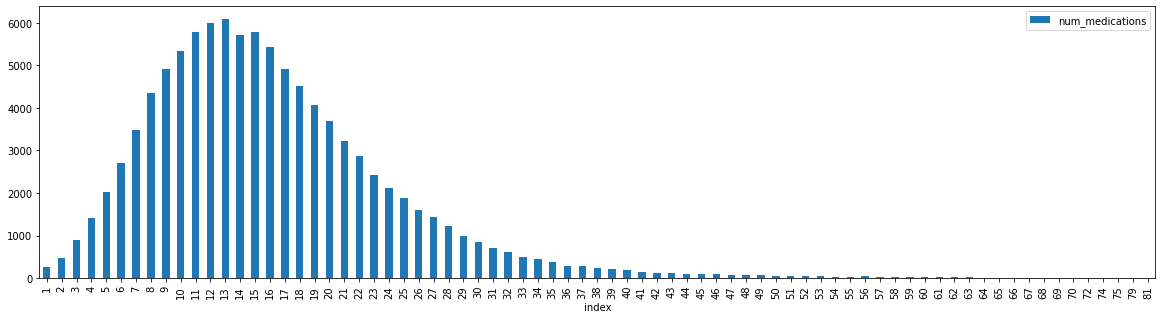

In [25]:
# draw histogram showing medication count 

plt.rcParams['figure.figsize'] = [20, 5]
df_med.plot.bar(x='index', y='num_medications')

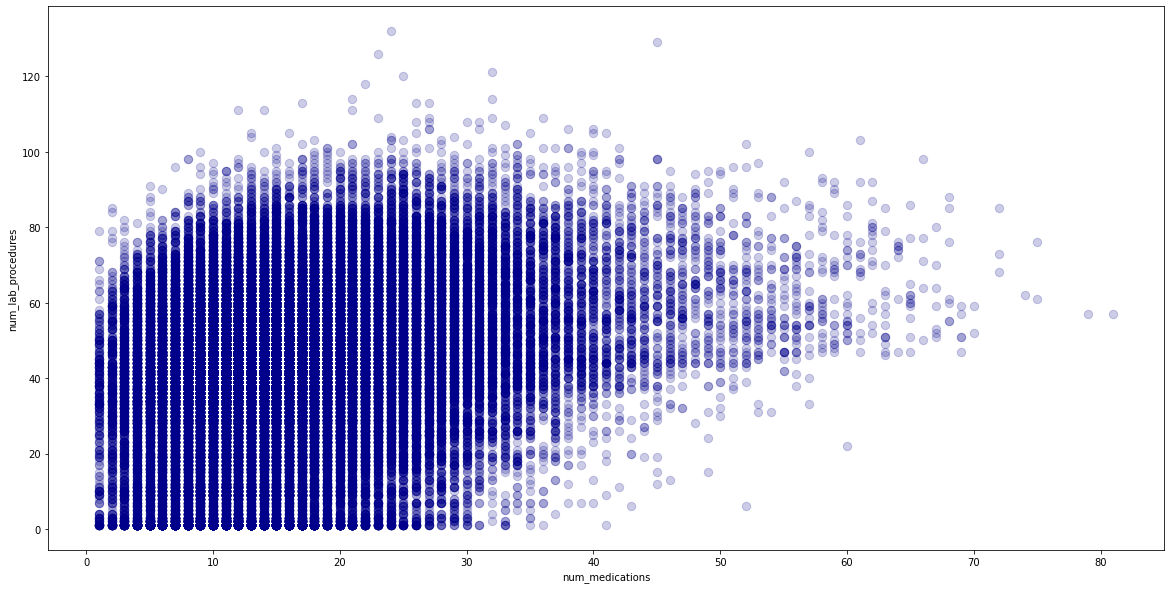

In [26]:
# scatter diagram 
plt.rcParams['figure.figsize'] = [20, 10]

ax1 = df.plot.scatter(y='num_lab_procedures',
                      x='num_medications',
                      c='DarkBlue', s=70, alpha=0.2)

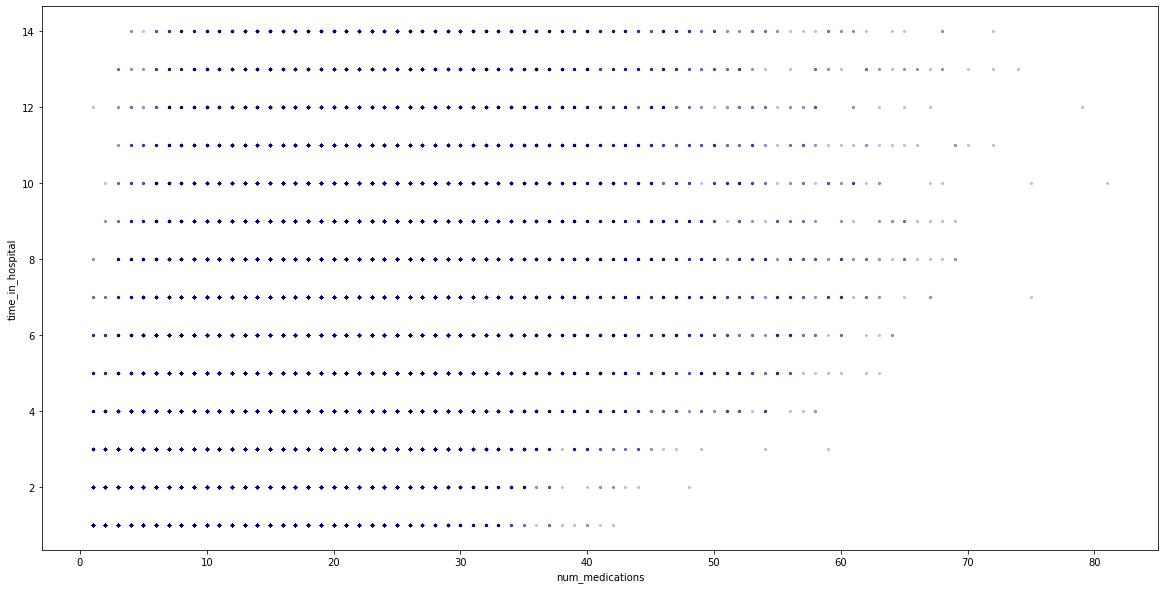

In [27]:
# Time in hospital / Number of Medications  

plt.rcParams['figure.figsize'] = [20, 10]

ax1 = df.plot.scatter(y='time_in_hospital',
                      x='num_medications',
                      c='DarkBlue', s=5, alpha=0.2)

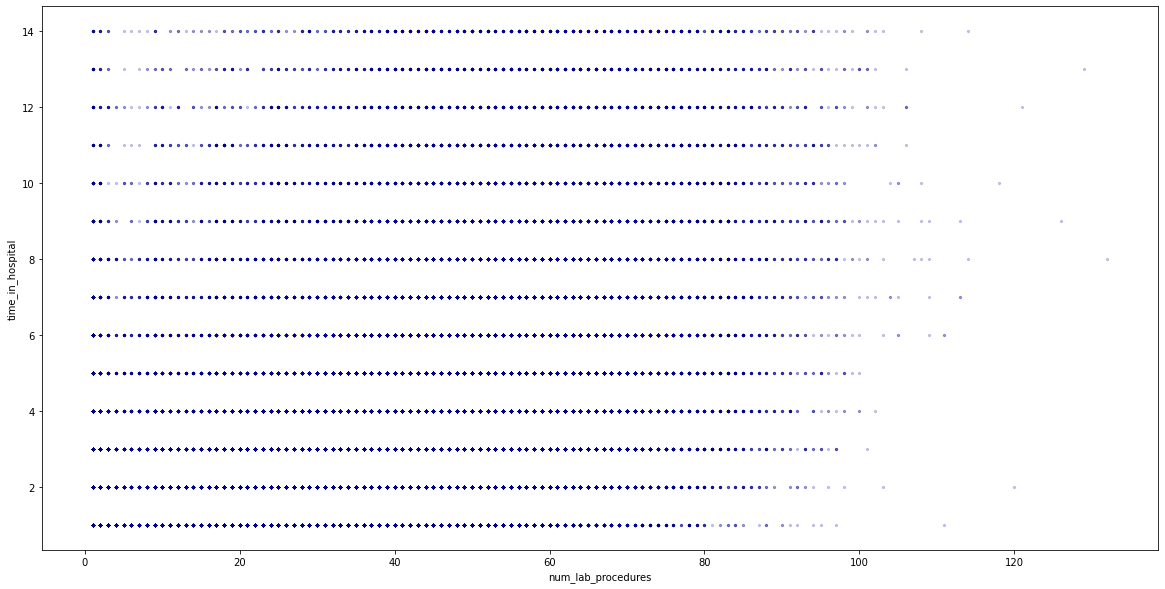

In [28]:
# Time in hospital / Lab Procedures

plt.rcParams['figure.figsize'] = [20, 10]

ax1 = df.plot.scatter(y='time_in_hospital',
                      x='num_lab_procedures',
                      c='DarkBlue', s=5, alpha=0.2)

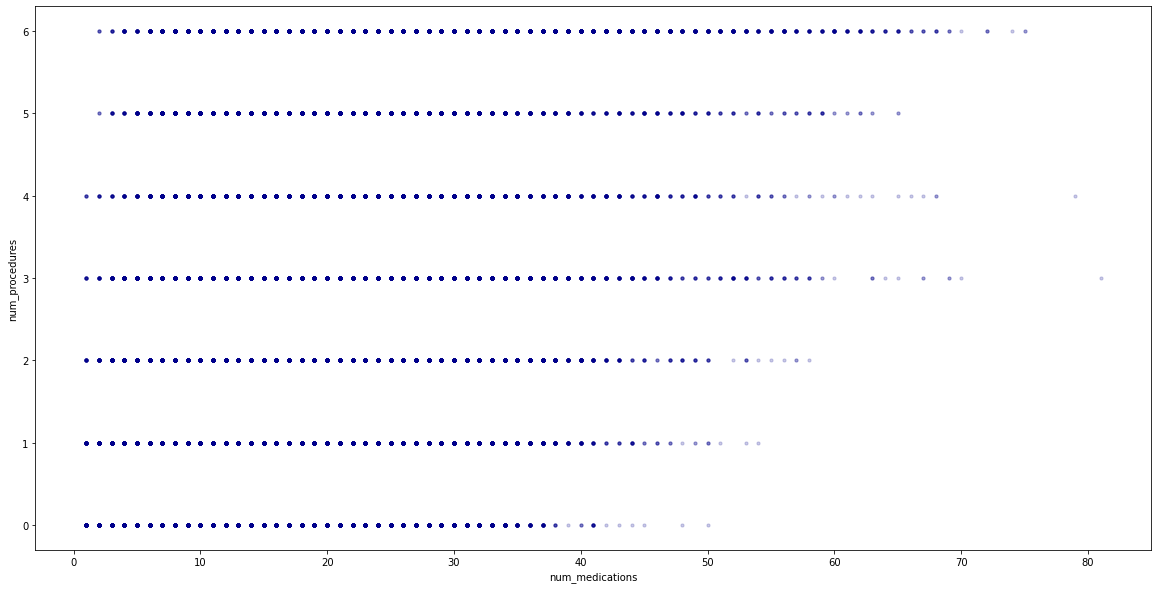

In [29]:
# Time in hospital / Number of Procedures

plt.rcParams['figure.figsize'] = [20, 10]

ax1 = df.plot.scatter(x='num_medications',
                      y='num_procedures',
                      c='DarkBlue', s=10, alpha=0.2)

In [30]:
# calculate standard deviation for all applicable columns 

df.std(axis = 0, skipna = True)


encounter_id                1.026403e+08
patient_nbr                 3.869636e+07
admission_type_id           1.445403e+00
discharge_disposition_id    5.280166e+00
admission_source_id         4.064081e+00
time_in_hospital            2.985108e+00
num_lab_procedures          1.967436e+01
num_procedures              1.705807e+00
num_medications             8.127566e+00
number_outpatient           1.267265e+00
number_emergency            9.304723e-01
number_inpatient            1.262863e+00
number_diagnoses            1.933600e+00
dtype: float64

In [31]:

# check how many missing "?" fields there are in each attribute

for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())


race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [32]:
# drop columns with over 40% missing values

#dropping columns with large number of missing values
df1 = df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)
print(df1.head(10))

   encounter_id  patient_nbr             race  gender       age  \
0       2278392      8222157        Caucasian  Female    [0-10)   
1        149190     55629189        Caucasian  Female   [10-20)   
2         64410     86047875  AfricanAmerican  Female   [20-30)   
3        500364     82442376        Caucasian    Male   [30-40)   
4         16680     42519267        Caucasian    Male   [40-50)   
5         35754     82637451        Caucasian    Male   [50-60)   
6         55842     84259809        Caucasian    Male   [60-70)   
7         63768    114882984        Caucasian    Male   [70-80)   
8         12522     48330783        Caucasian  Female   [80-90)   
9         15738     63555939        Caucasian  Female  [90-100)   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1   

In [33]:
df1.shape

(101766, 47)

In [34]:
# replace missing values with NA

missing_data = ["?", "NA", "nan"]
df2 = df1.replace(missing_data, np.NaN)

# check through missing ? fields again
for col in df2.columns:
    if df2[col].dtype == object:
         print(col,df2[col][df2[col] == '?'].count())


race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [35]:
# clean the age table to make brackets consistent 

print(df2['age'].value_counts())

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


In [36]:
# checking random medication values 
print(df2['rosiglitazone'].value_counts())


No        95401
Steady     6100
Up          178
Down         87
Name: rosiglitazone, dtype: int64


In [37]:
# checking race values 
print(df2['race'].value_counts())


Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


In [38]:
# checking gender values 
print(df2['gender'].value_counts())


Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64


In [39]:
# replace yes = 1 and no = 0 in diabetesMed
df2['diabetesMed'] = df2['diabetesMed'].replace(['Yes','No'],['1', '0'])

# replace ch = 1 and no = 0 in change
df2['change'] = df2['change'].replace(['Ch','No'],['1', '0'])

print(df2.head(10))

   encounter_id  patient_nbr             race  gender       age  \
0       2278392      8222157        Caucasian  Female    [0-10)   
1        149190     55629189        Caucasian  Female   [10-20)   
2         64410     86047875  AfricanAmerican  Female   [20-30)   
3        500364     82442376        Caucasian    Male   [30-40)   
4         16680     42519267        Caucasian    Male   [40-50)   
5         35754     82637451        Caucasian    Male   [50-60)   
6         55842     84259809        Caucasian    Male   [60-70)   
7         63768    114882984        Caucasian    Male   [70-80)   
8         12522     48330783        Caucasian  Female   [80-90)   
9         15738     63555939        Caucasian  Female  [90-100)   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1   

In [40]:
# check values via count

print(df2['insulin'].value_counts())

print(df2['readmitted'].value_counts())


No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64
NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64


In [41]:
# drop all patients who have been readmitted over 30 days 
# df2.drop(df2.loc[df2['readmitted'] == '>30'].index, inplace=True)

# print(df2['readmitted'].value_counts())


In [42]:
# change No = 0 and under 30 day readmissions = 1 

df2['readmitted'] = df2['readmitted'].replace(['NO','<30', '>30'],[0, 1, 0])
print(df2['readmitted'].value_counts())


0    90409
1    11357
Name: readmitted, dtype: int64


In [43]:
# check counts 
print(df2['change'].value_counts())
print(df2['diabetesMed'].value_counts())


0    54755
1    47011
Name: change, dtype: int64
1    78363
0    23403
Name: diabetesMed, dtype: int64


In [44]:
# change No = 0 and Ch = 1 in change
df2['change'] = df2['change'].replace(['Ch','No'],[1, 0])

# change No = 0 and Yes = 1 in DiabetesMed
df2['diabetesMed'] = df2['diabetesMed'].replace(['Yes','No'],[1, 0])

# check counts 
print(df2['change'].value_counts())
print(df2['diabetesMed'].value_counts())


0    54755
1    47011
Name: change, dtype: int64
1    78363
0    23403
Name: diabetesMed, dtype: int64


In [45]:
# rename readmit collumn header to 30 day readmit

df2.rename(columns={'readmitted':'30_day_readmitted'}, 
                 inplace=True)

df2.reset_index()

print(df2)

        encounter_id  patient_nbr             race  gender      age  \
0            2278392      8222157        Caucasian  Female   [0-10)   
1             149190     55629189        Caucasian  Female  [10-20)   
2              64410     86047875  AfricanAmerican  Female  [20-30)   
3             500364     82442376        Caucasian    Male  [30-40)   
4              16680     42519267        Caucasian    Male  [40-50)   
...              ...          ...              ...     ...      ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)   
101763     443854148     41088789        Caucasian    Male  [70-80)   
101764     443857166     31693671        Caucasian  Female  [80-90)   
101765     443867222    175429310        Caucasian    Male  [70-80)   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    

In [46]:
df2 = df2.infer_objects()

df2.dtypes


encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

In [47]:
# convert all diagnosis ICD 9 Codes to actual diagnosis names
def convertDiag(number):
    
    if str(number).startswith('V'):
        return "Influences"
    elif str(number).startswith('E'):
        return "Influences" 
        
    if float(number) <= 139:
        return "Parasite"
    elif float(number) <= 239:
        return "Neoplasms"
    elif float(number) <= 279:
        return "Immunity"
    elif float(number) <= 289:
        return "Blood"
    elif float(number) <= 319:
        return "Mental"
    elif float(number) <= 389:
        return "Nervous"
    elif float(number) <= 459:
        return "Circulatory"
    elif float(number) <= 519:
        return "Respiratory"
    elif float(number) <= 579:
        return "Digestive"
    elif float(number) <= 629:
        return "Genitourinary"
    elif float(number) <= 679:
        return "Pregnancy"
    elif float(number) <= 709:
        return "Skin"
    elif float(number) <= 739:
        return "Tissue"
    elif float(number) <= 759:
        return "Congenital"
    elif float(number) <= 779:
        return "Perinatal"
    elif float(number) <= 799:
        return "Symptons"
    elif float(number) <= 999:
        return "Injury"

# change diag 1
    
df2['diag_1'].apply(convertDiag)
print(df2['diag_1'].value_counts())
    

428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
870       1
817       1
791       1
471       1
640       1
Name: diag_1, Length: 716, dtype: int64


In [48]:
# change diag 2
df2['diag_2'] = df2['diag_2'].apply(convertDiag)

print(df2['diag_2'].value_counts())


Circulatory      31365
Immunity         21017
Respiratory      10251
Genitourinary     7987
Symptons          4632
Digestive         3962
Skin              3596
Blood             2926
Mental            2657
Neoplasms         2547
Influences        2536
Injury            2428
Parasite          1931
Tissue            1764
Nervous           1286
Pregnancy          415
Congenital         108
Name: diag_2, dtype: int64


In [49]:
# change diag 3

df2['diag_3'] = df2['diag_3'].apply(convertDiag)

print(df2['diag_3'].value_counts())


Circulatory      29918
Immunity         26308
Respiratory       6774
Genitourinary     6327
Influences        5058
Symptons          4523
Digestive         3572
Mental            3136
Blood             2490
Skin              2488
Injury            1946
Tissue            1915
Parasite          1861
Neoplasms         1856
Nervous           1766
Pregnancy          309
Congenital          96
Name: diag_3, dtype: int64


In [51]:
# sum of multiple treatment columns 

df2['total_treatments'] = df2["num_medications"] + df2["num_procedures"] + df2["num_lab_procedures"]

print(df2['total_treatments'])
print(df2.head(10))

0         42
1         77
2         29
3         61
4         59
          ..
101761    67
101762    54
101763    62
101764    68
101765    19
Name: total_treatments, Length: 101766, dtype: int64
   encounter_id  patient_nbr             race  gender       age  \
0       2278392      8222157        Caucasian  Female    [0-10)   
1        149190     55629189        Caucasian  Female   [10-20)   
2         64410     86047875  AfricanAmerican  Female   [20-30)   
3        500364     82442376        Caucasian    Male   [30-40)   
4         16680     42519267        Caucasian    Male   [40-50)   
5         35754     82637451        Caucasian    Male   [50-60)   
6         55842     84259809        Caucasian    Male   [60-70)   
7         63768    114882984        Caucasian    Male   [70-80)   
8         12522     48330783        Caucasian  Female   [80-90)   
9         15738     63555939        Caucasian  Female  [90-100)   

   admission_type_id  discharge_disposition_id  admission_source_i

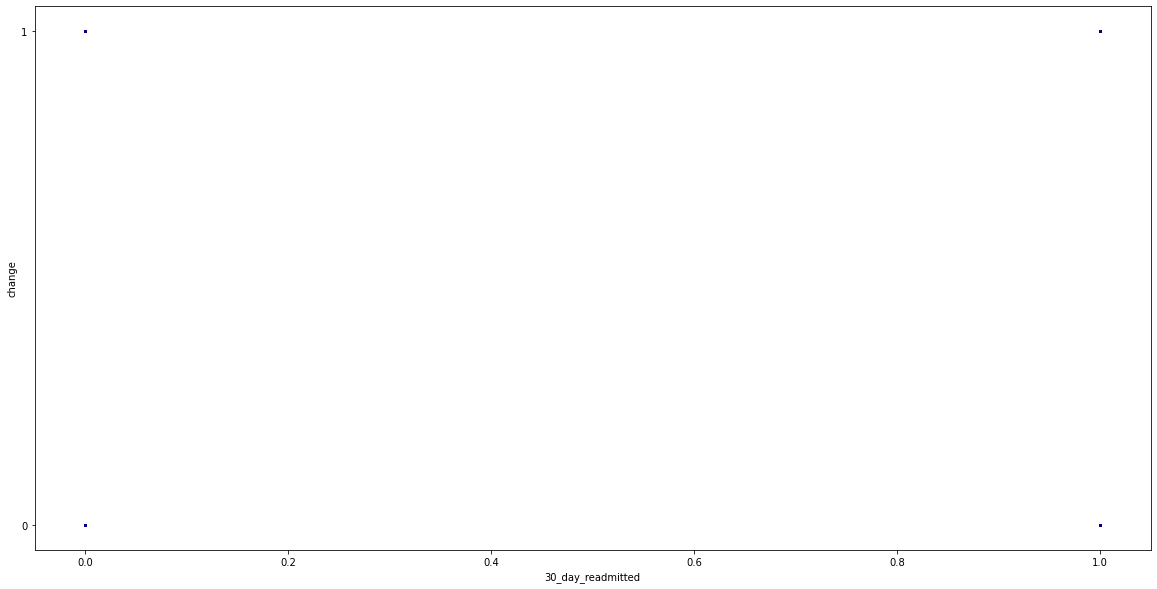

In [63]:
# Time in hospital / Number of Procedures

plt.rcParams['figure.figsize'] = [20, 10]

ax1 = df2.plot.scatter(y='change',
                      x='30_day_readmitted',
                      c='DarkBlue', s=1, alpha=0.2)

In [52]:
print(df2['30_day_readmitted'].value_counts())

0    90409
1    11357
Name: 30_day_readmitted, dtype: int64


In [53]:
# export ready to use in WEKA

df2.to_csv('diabetes_data.csv', index = False)
